<img src="front.jpg" align="center"/>
&nbsp

# 📖 Background
In the mystical land of **Arcadia**, where pixels and bits weave the fabric of reality, the ancient and revered **Valut of Classics** has begun to fade into obscurity. This vault, a legendary archive that houses the most iconic video games from 1980 to 2020, is threatened to be lost forever. Without intervention, the stories and legacies of these timeless classics may be forgotten.


You are a brave Data Sorcerer summoned by the Keepers of the vault. Your mission is not just a task, but an exhilarating adventure. You will delve into the vault, uncover the secrets of these legendary titles, and breathe new life into their stories. Along the way, you will face a series of challenges designed to test your skills in data analysis, visualization, and storytelling. Get ready for an epic journey!
You must:
1. **Map the classics**
2. **Race through time**

# 💾 The data


| Columns    | Description |
| -------- | ------- | 
| Rank | Ranking of overall sales    | 
| Name    | Name of the game    | 
| Platform  | Platform of the games release (Wii, DS, PS3, etc.)    | 
| Year | Release year     | 
| Genre    | Category of the game    | 
| Publisher   | who developed it (i.e. Nintento,Microsoft Games Studio, etc.)    | 
| NA_Sales | Sales in North America (in millions)     | 
| EU_Sales    | Sales in Japan (in millions)    | 
| JP_Sales    | Sales in Japan (in millions)   | 
| Other_Sales    | Sales in the rest of the world (in millions    | 
| Global_Sales    | Total worldwide sales   | 


In [19]:
import pandas as pd
games = pd.read_csv('./data/vgsales.csv')
og = games.copy()
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


***Data Validation performed below in hidden cells***

In [3]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

gbr = GradientBoostingRegressor(max_depth=10)
rs = RobustScaler()

# Select only numeric columns
numeric_data = games.drop('Publisher', axis=1).select_dtypes(exclude='object').dropna()

# Separate features and target
X = numeric_data.drop('Year', axis=1)
y = numeric_data['Year']

# Scale the features
X_scaled = rs.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.03)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
pred = gbr.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Error (with rounding): {np.mean(abs(y_test - np.round(pred)))}")

Mean Absolute Error: 3.01695128095829
Mean Absolute Error (with rounding): 3.036734693877551


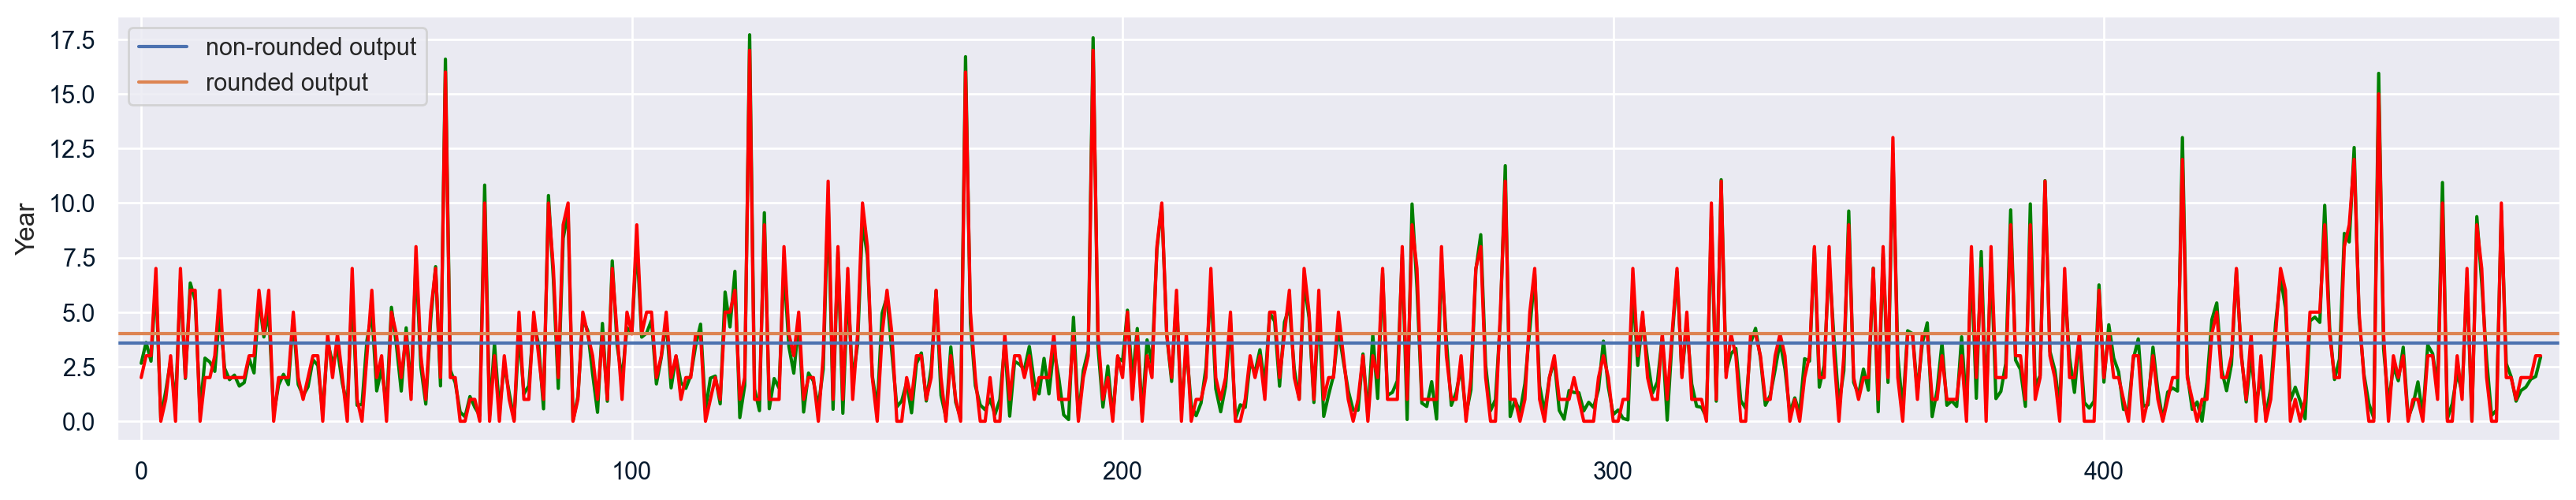

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

diff = abs(y_test - pred)
diff1 = abs(y_test - np.floor(pred))

plt.figure(figsize=(20,3.5))
sns.lineplot(x=range(len(y_test)), y=diff, color='green')
sns.lineplot(x=range(len(y_test)), y=diff1, color='red')
plt.plot([plt.xlim()[0], plt.xlim()[1]], [np.percentile(diff, 70) for i in range(2)], label='non-rounded output')
plt.plot([plt.xlim()[0], plt.xlim()[1]], [np.percentile(diff1, 70) for i in range(2)], label='rounded output')

plt.xlim(-5,493)
plt.legend()
plt.show()

In [6]:
vals = []
for _,row in games.iterrows():
    if 'na' in str(row['Year']):
        row = pd.DataFrame(row).transpose()
        for col in row.columns:
            try:
                row[col] = row[col].astype(float)
            except:
                pass
            try:
                row.drop('Publisher', axis=1, inplace=True)
                row.drop('Platform', axis=1, inplace=True)
                row.drop('Genre', axis=1, inplace=True)
            except:
                pass
        row = row.select_dtypes(exclude=object).drop('Year',axis=1)
        vals.append(round(gbr.predict(row)[0]))
    else:
        vals.append(row['Year'])
        
games['Year'] = vals

In [7]:
games.dropna(subset='Publisher', inplace=True)

In [8]:
games.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [10]:
games['Year'] = games['Year'].astype(int)
games.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## The gaming industry's progress (publishers entering the industry)

From the plot, we can see that around 1991, there was a boom in the distinct number of publishers, but, like the narrative of this report says, the number of publishers is decreasing rapidly. In 2008, there were the most distinct publishers in the industry.

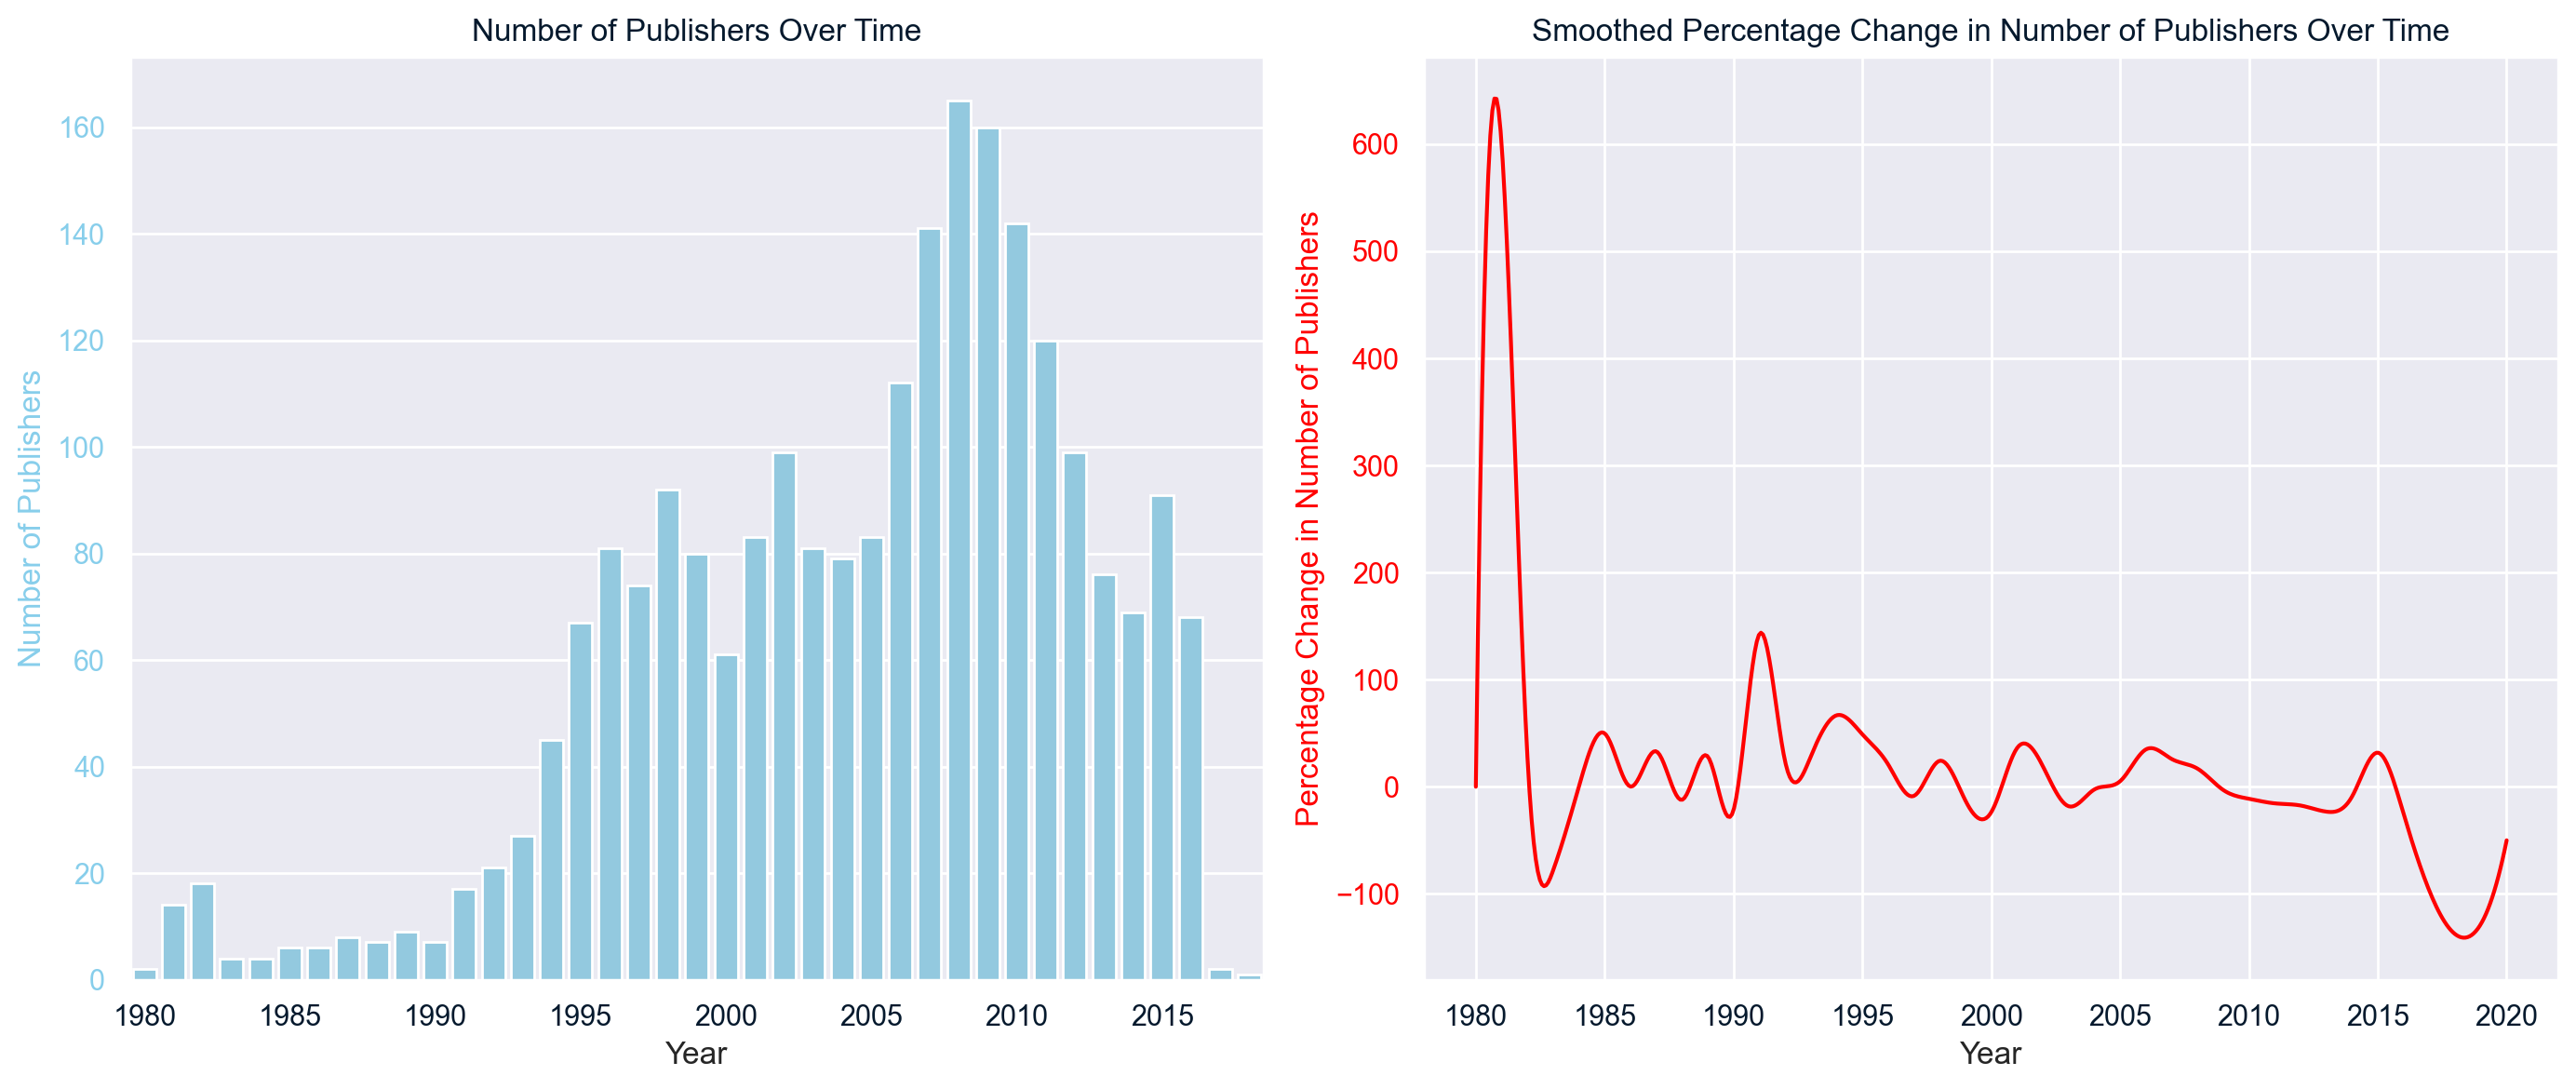

In [11]:
from scipy.interpolate import UnivariateSpline

n_publishers = og.groupby('Year')['Publisher'].nunique()
vals = []
prev_val = 2
for val in n_publishers:
    vals.append(round((val-prev_val)/prev_val*100,1))
    prev_val = val    

vals_df = pd.DataFrame({'Year': n_publishers.index, 'Change': vals})

spline = UnivariateSpline(vals_df['Year'], vals_df['Change'], s=1)

x_smooth = np.linspace(vals_df['Year'].min(), vals_df['Year'].max(), 500)
y_smooth = spline(x_smooth)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=n_publishers.index, y=n_publishers.values, ax=ax1, color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Publishers', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels([i if i % 5 == 0 else '' for i in range(1980, 2020+1)])
ax1.set_title('Number of Publishers Over Time')

sns.lineplot(x=x_smooth, y=y_smooth, ax=ax2, color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage Change in Number of Publishers', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_title('Smoothed Percentage Change in Number of Publishers Over Time')

plt.tight_layout()
plt.show()

## Most popular genres over the years

The *Action* genre has been consistenly popular since 1997; most of the years it was the mostly-made genre. The _Miscallenous_ (other game categories) category also had a period of time of high popularity from 2005 to 2011. The *Racing* genre was regularly popular until 2003. 

In [12]:
import seaborn as sns
import plotly.express as px
import pandas as pd

genre_counts = games.groupby(['Year', 'Genre']).size().reset_index(name='Count')

genre_counts['Rank'] = genre_counts.groupby('Year')['Count'].rank(method='first', ascending=False)
top_genres = genre_counts[genre_counts['Rank'] <= 3]

genre_pivot = top_genres.pivot(index='Year', columns='Genre', values='Count').fillna(0)

total_counts = genre_pivot.sum().sort_values(ascending=False)

unstacked_df = genre_pivot[total_counts.index].stack().reset_index(name='Count')
unstacked_df.columns = ['Year', 'Genre', 'Count']

fig = px.bar(unstacked_df, 
             x='Year', 
             y='Count', 
             color='Genre', 
             title='Total Count of Games per Top 3 Genres Over Years', 
             labels={'Count': 'Total Count of Games', 'Year': 'Year'},
             color_discrete_sequence=px.colors.qualitative.G10,
             category_orders={'Genre': total_counts.index.tolist()})

fig.show()

### Top 3 most game-producing publishers

Only **Electronic Arts**, by the looks of it, got to develop an advantage of creating more games than others before something happened to the industry, and like the others, the business slowly shut down, or was failing to get stored in Arcadia. **Namco Bandai Games** and **Activision** both probably didn't have enough time to develop their company, when Arcadia was damaged, or for whatever reason. Other companies not-displayed here probably had the same experience.

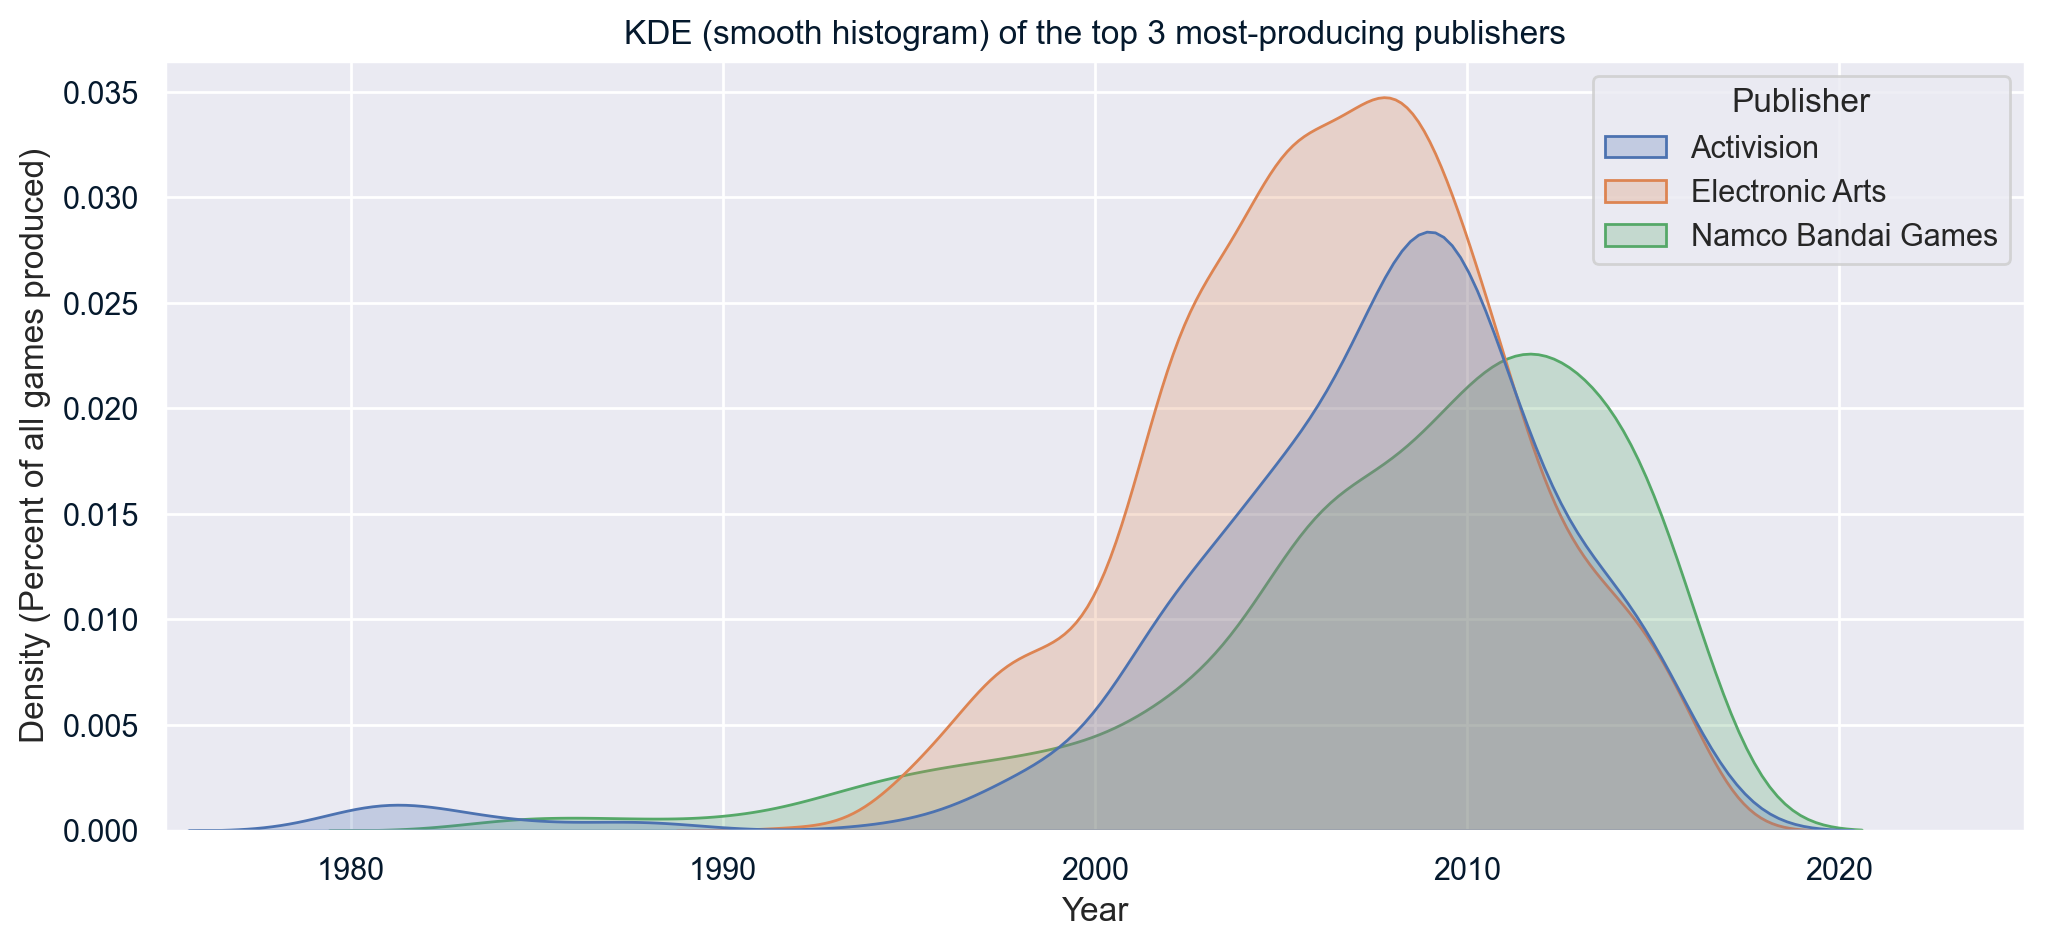

In [17]:
top3_pubs = games.groupby('Publisher')['Genre'].count().sort_values(ascending=False).index.to_list()[:3]
plt.figure(figsize=(12,5))
sns.kdeplot(x='Year', hue='Publisher', data=games[games['Publisher'].isin(top3_pubs)], fill=True)
plt.xlim(1975,2025)
plt.title('KDE (smooth histogram) of the top 3 most-producing publishers')
plt.ylabel('Density (Percent of all games produced)')
plt.show()

In [14]:
def sum_vals(var, match, col_name):
    for val in matches[col_name]:
        var += val
    return var
        
name_set = list(set(games.Name.to_list()))
duplicated = []
for index, name in enumerate(games.Name):
    if name in name_set:
        del(name_set[name_set.index(name)])
    else:
        duplicated.append(name)

games[games.Name.isin(duplicated)]

non_duplicates = pd.DataFrame(columns=['Name', 'Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

set_duplicates = set(duplicated)
already_done = []

for name,year,genre in zip(games.Name,games.Year,games.Genre):
    if name in already_done:
        continue
    elif name in set_duplicates:
        already_done.append(name)
        
        matches = games[games.Name == name]
        na_sales = 0
        eu_sales = 0
        jp_sales = 0
        other_sales = 0
        global_sales = 0
        
        row = {'Name':name, 'Year':year, 'Genre':genre,
               'NA_Sales':sum_vals(na_sales, matches, 'NA_Sales'),
               'EU_Sales':sum_vals(eu_sales, matches, 'EU_Sales'),
               'JP_Sales':sum_vals(jp_sales, matches, 'JP_Sales'),
               'Other_Sales':sum_vals(other_sales, matches, 'Other_Sales'),
               'Global_Sales':sum_vals(global_sales, matches, 'Global_Sales'),
              }
        
        non_duplicates = pd.concat([non_duplicates, pd.DataFrame(row, index=[0])])
        
    else:
        non_duplicates = pd.concat([non_duplicates, games[games.Name == name][['Name', 'Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]])
        
non_duplicates = non_duplicates.sort_values('Global_Sales', ascending=False)
non_duplicates['new_rank'] = list(range(1,len(non_duplicates)+1))
non_duplicates.set_index('new_rank', inplace=True)

In [15]:
from PIL import Image
import numpy as np

img = Image.open('crown.jpg')
img = img.convert("RGBA")
data = np.array(img)
data = np.fliplr(data)

mask = (data[:, :, :3] >= [249, 249, 249]).all(axis=2)
data[:, :, 3][mask] = 0

new_img = Image.fromarray(data, mode="RGBA")
new_img.save('crown.png')

## Overall winner

The overall winner that had the most sales, was...

# 🥇 **Wii Sports**
## 🥈 **Grand Theft Auto V**
### 🥉 **Super Mario Bros.**

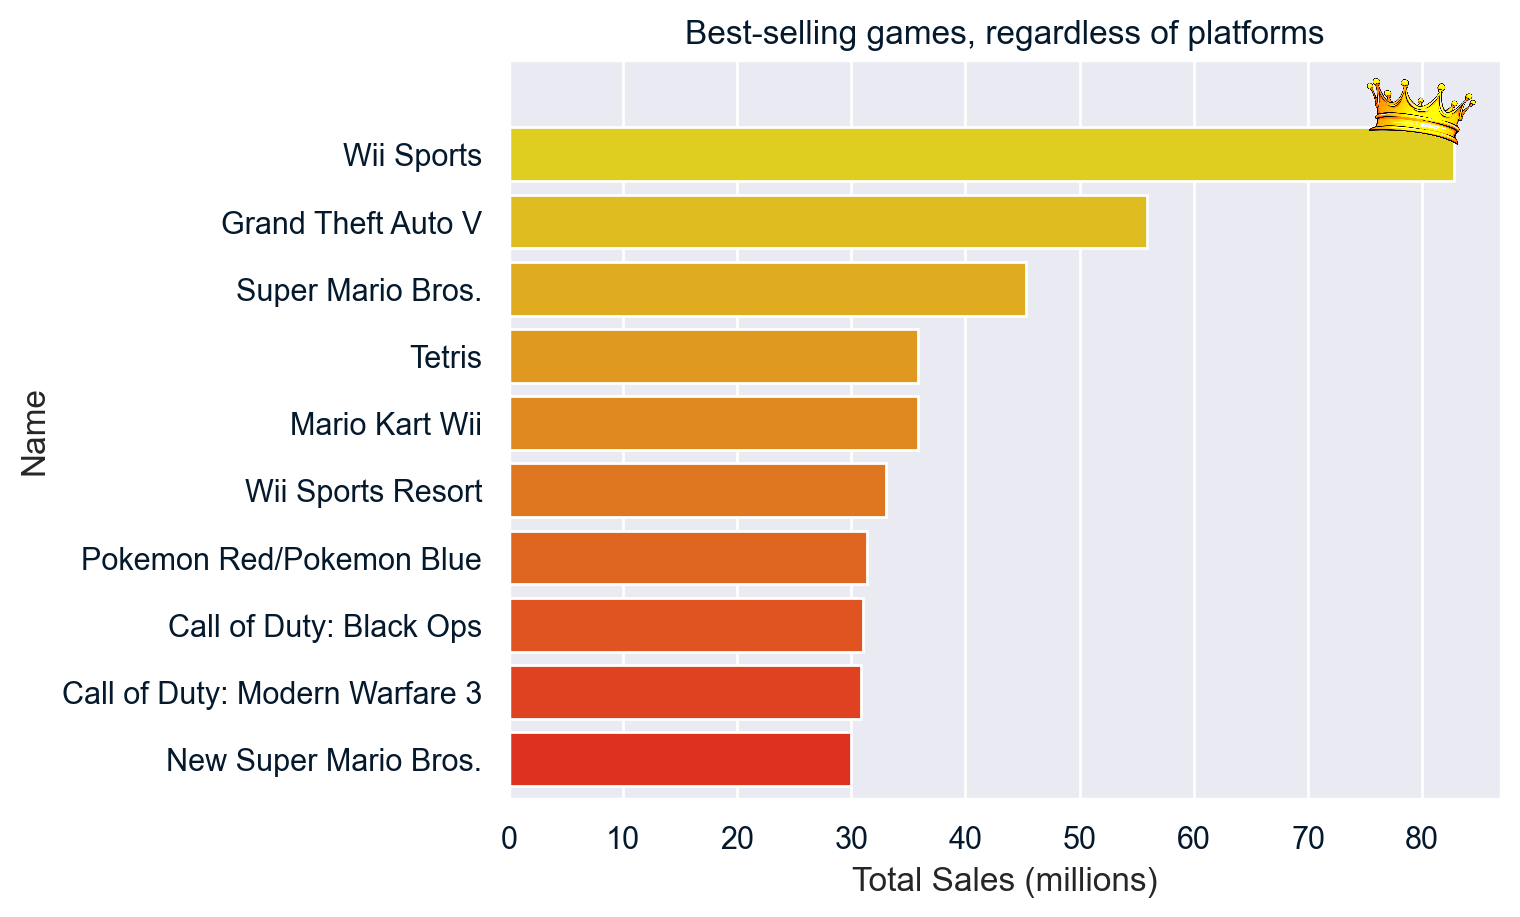

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load your crown image
img = mpimg.imread('crown.png') 

# Create your plot
sns.set()
ax = sns.barplot(y='Name', x='Global_Sales', data=non_duplicates[:10], orient='h', hue='Name', palette='autumn_r')
plt.title('Best-selling games, regardless of platforms')

# Add the crown image at the specified coordinates
imagebox = OffsetImage(img, zoom=0.08)  # Adjust zoom to fit your image size
ab = AnnotationBbox(imagebox, (79.9, -0.65), frameon=False)
ax.add_artist(ab)

plt.ylim(9.6,-1.4)

plt.xlabel('Total Sales (millions)')

plt.show()